Parsing PDB file...
Projecting 3D structure onto the xy-plane...
Displaying the 2D projection...


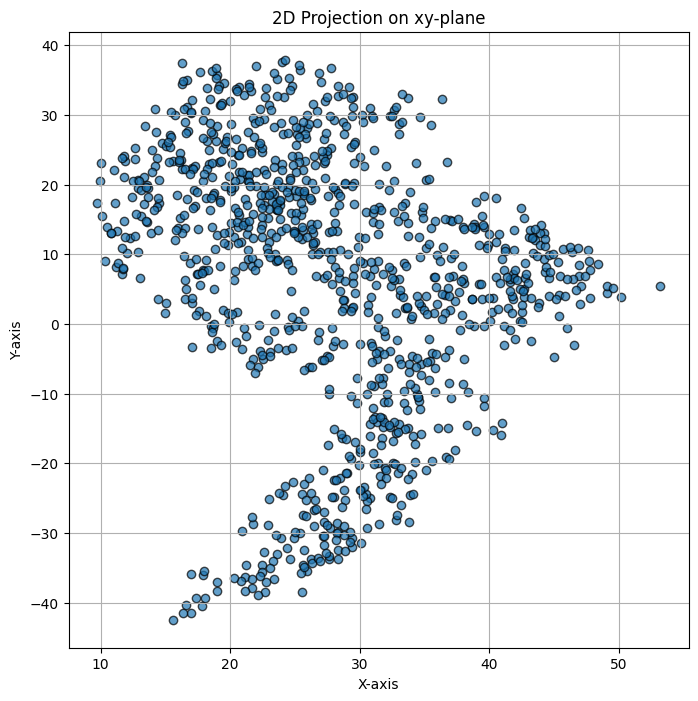

In [2]:
# Import necessary libraries
from Bio.PDB import PDBParser
import numpy as np
import matplotlib.pyplot as plt

# Function to parse the PDB file and extract atomic coordinates
def parse_pdb(file_path):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", file_path)
    atoms = []

    for atom in structure.get_atoms():
        atoms.append(atom.coord)

    return np.array(atoms)

# Function to project 3D coordinates onto a 2D plane
def project_3d_to_2d(atoms, projection_plane='xy'):
    if projection_plane == 'xy':
        return atoms[:, :2]
    elif projection_plane == 'xz':
        return atoms[:, [0, 2]]
    elif projection_plane == 'yz':
        return atoms[:, 1:]
    else:
        raise ValueError("Invalid projection plane. Choose 'xy', 'xz', or 'yz'.")

# Function to visualize the 2D projection
def plot_2d_projection(projection, title="2D Projection"):
    plt.figure(figsize=(8, 8))
    plt.scatter(projection[:, 0], projection[:, 1], alpha=0.7, edgecolors='k')
    plt.title(title)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid(True)
    plt.show()

# Main execution block
def main():
    # Specify the PDB file path (replace 'example.pdb' with your PDB file path)
    pdb_file_path = "example.pdb"

    # Parse the PDB file
    print("Parsing PDB file...")
    atoms = parse_pdb(pdb_file_path)

    # Choose the projection plane ('xy', 'xz', 'yz')
    projection_plane = 'xy'

    # Project the 3D coordinates onto the 2D plane
    print(f"Projecting 3D structure onto the {projection_plane}-plane...")
    projection = project_3d_to_2d(atoms, projection_plane)

    # Display the 2D projection
    print("Displaying the 2D projection...")
    plot_2d_projection(projection, title=f"2D Projection on {projection_plane}-plane")

# Run the main function
if __name__ == "__main__":
    main()


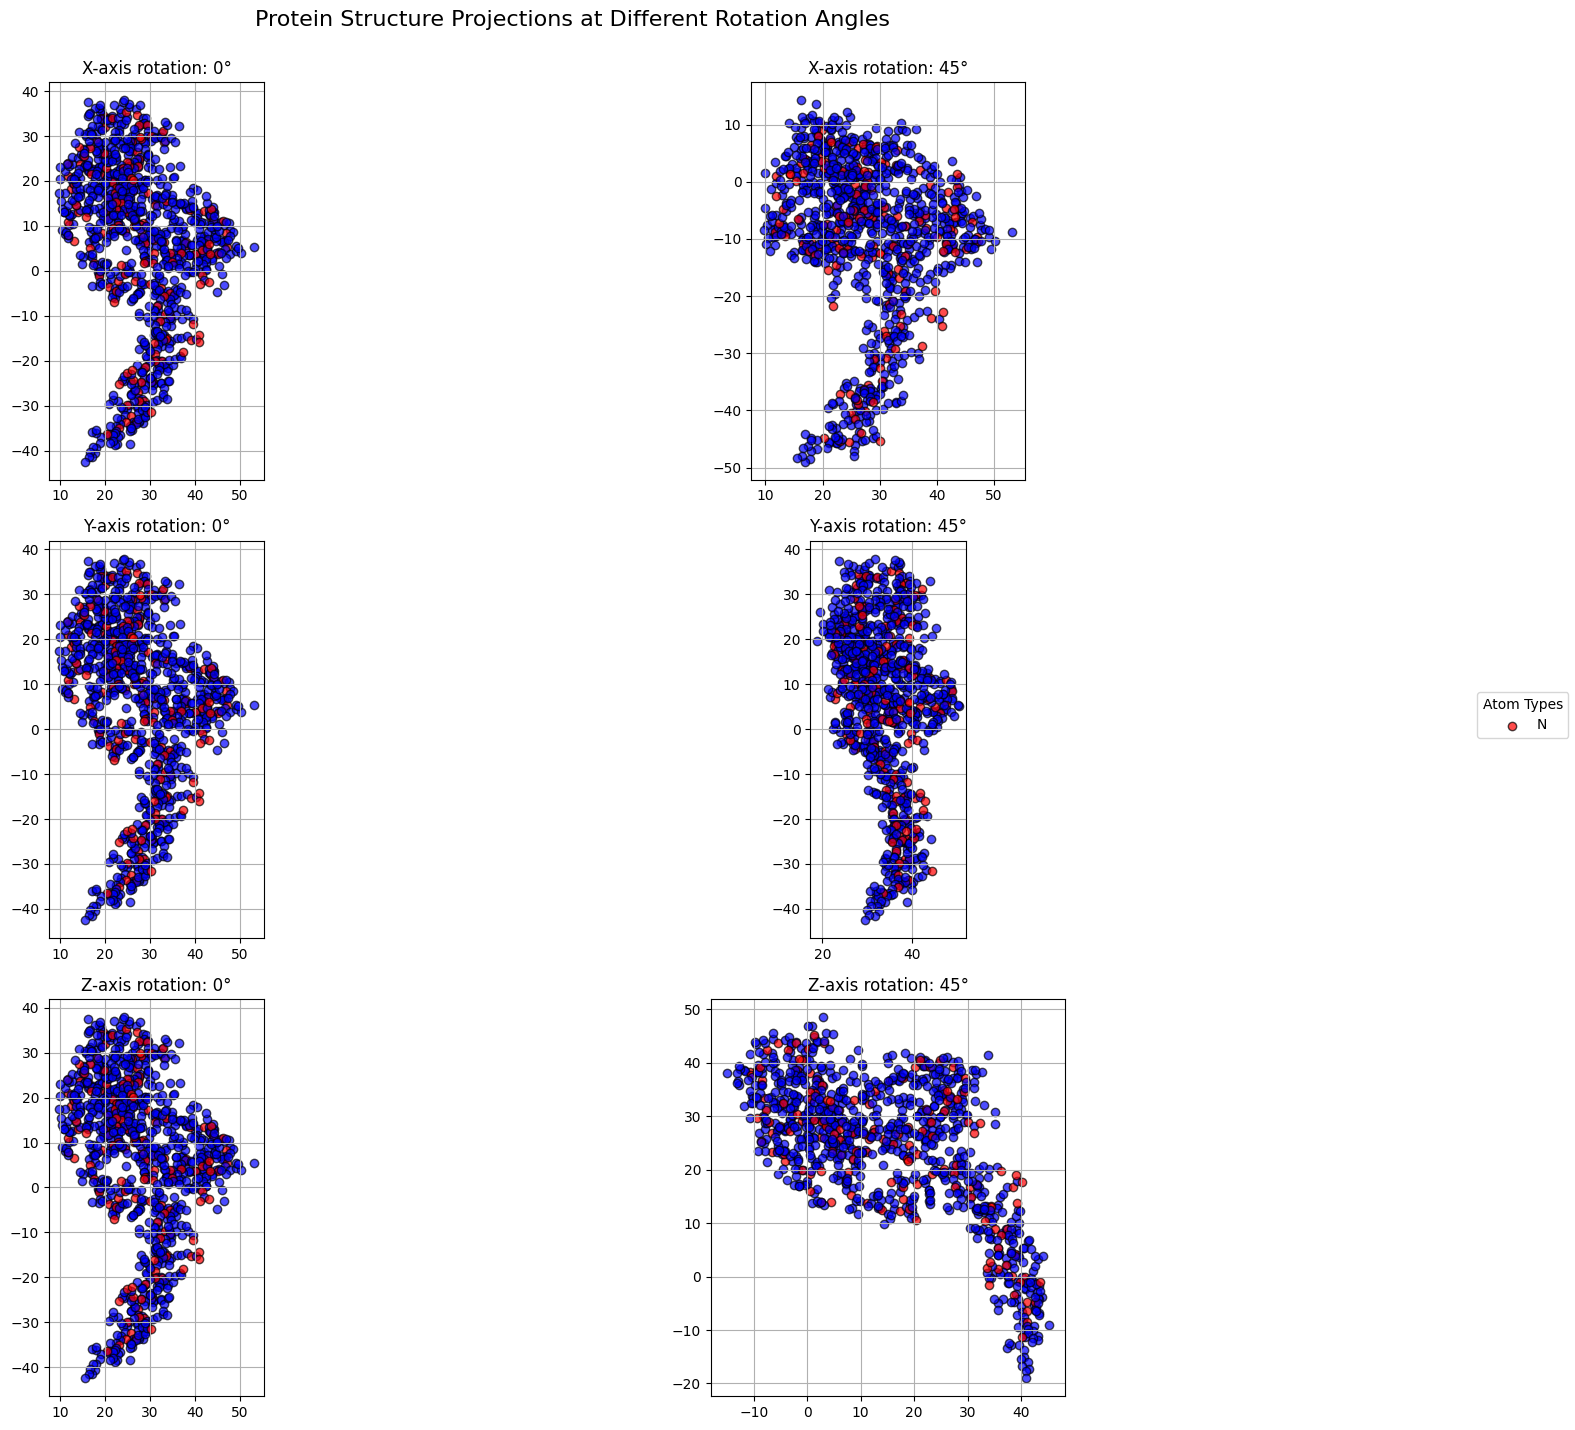

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

class ProteinVisualizer:
    def __init__(self, pdb_file):
        self.parser = PDBParser(QUIET=True)
        self.structure = self.parser.get_structure("protein", pdb_file)
        self.atoms, self.atom_types = self.extract_atoms()

    def extract_atoms(self):
        """Extract atomic coordinates and types from the structure"""
        atoms = []
        atom_types = []

        for atom in self.structure.get_atoms():
            atoms.append(atom.coord)
            atom_types.append(atom.element)

        return np.array(atoms), atom_types

    def rotate_structure(self, angles):
        """Rotate atomic coordinates using Euler angles (in degrees)"""
        rot = Rotation.from_euler('xyz', angles, degrees=True)
        return rot.apply(self.atoms)

    def project_to_2d(self, rotated_coords):
        """Project 3D coordinates to 2D plane (simple orthographic projection)"""
        return rotated_coords[:, :2]

    def plot_projection(self, coords_2d, ax, title):
        """Plot 2D projection with atom-specific coloring"""
        for i, (coord, atom_type) in enumerate(zip(coords_2d, self.atom_types)):
            color = 'red' if atom_type == 'N' else 'blue'
            ax.scatter(coord[0], coord[1], c=color, alpha=0.7,
                      edgecolors='k', label=atom_type if i == 0 else "")

        ax.set_title(title)
        ax.grid(True)
        ax.set_aspect('equal')

    def create_rotation_plots(self):
        """Create plots for multiple rotations"""
        angles = np.arange(0, 360, 45)
        n_rows = 3  # One row for each axis
        n_cols = len(angles) // 3

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
        fig.suptitle('Protein Structure Projections at Different Rotation Angles',
                    fontsize=16, y=0.95)

        for i, axis in enumerate(['X', 'Y', 'Z']):
            for j, angle in enumerate(angles[:(n_cols)]):
                rotation = np.zeros(3)
                rotation[i] = angle

                rotated_coords = self.rotate_structure(rotation)
                projected_coords = self.project_to_2d(rotated_coords)

                title = f'{axis}-axis rotation: {angle}°'
                self.plot_projection(projected_coords, axes[i, j], title)

        # Add legend
        handles, labels = axes[0, 0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='center right', title='Atom Types')

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])
        return fig

def main():
    # Replace with your PDB file path
    pdb_file = "example.pdb"

    visualizer = ProteinVisualizer(pdb_file)
    fig = visualizer.create_rotation_plots()

    # Save the figure
    plt.savefig('protein_projections.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()

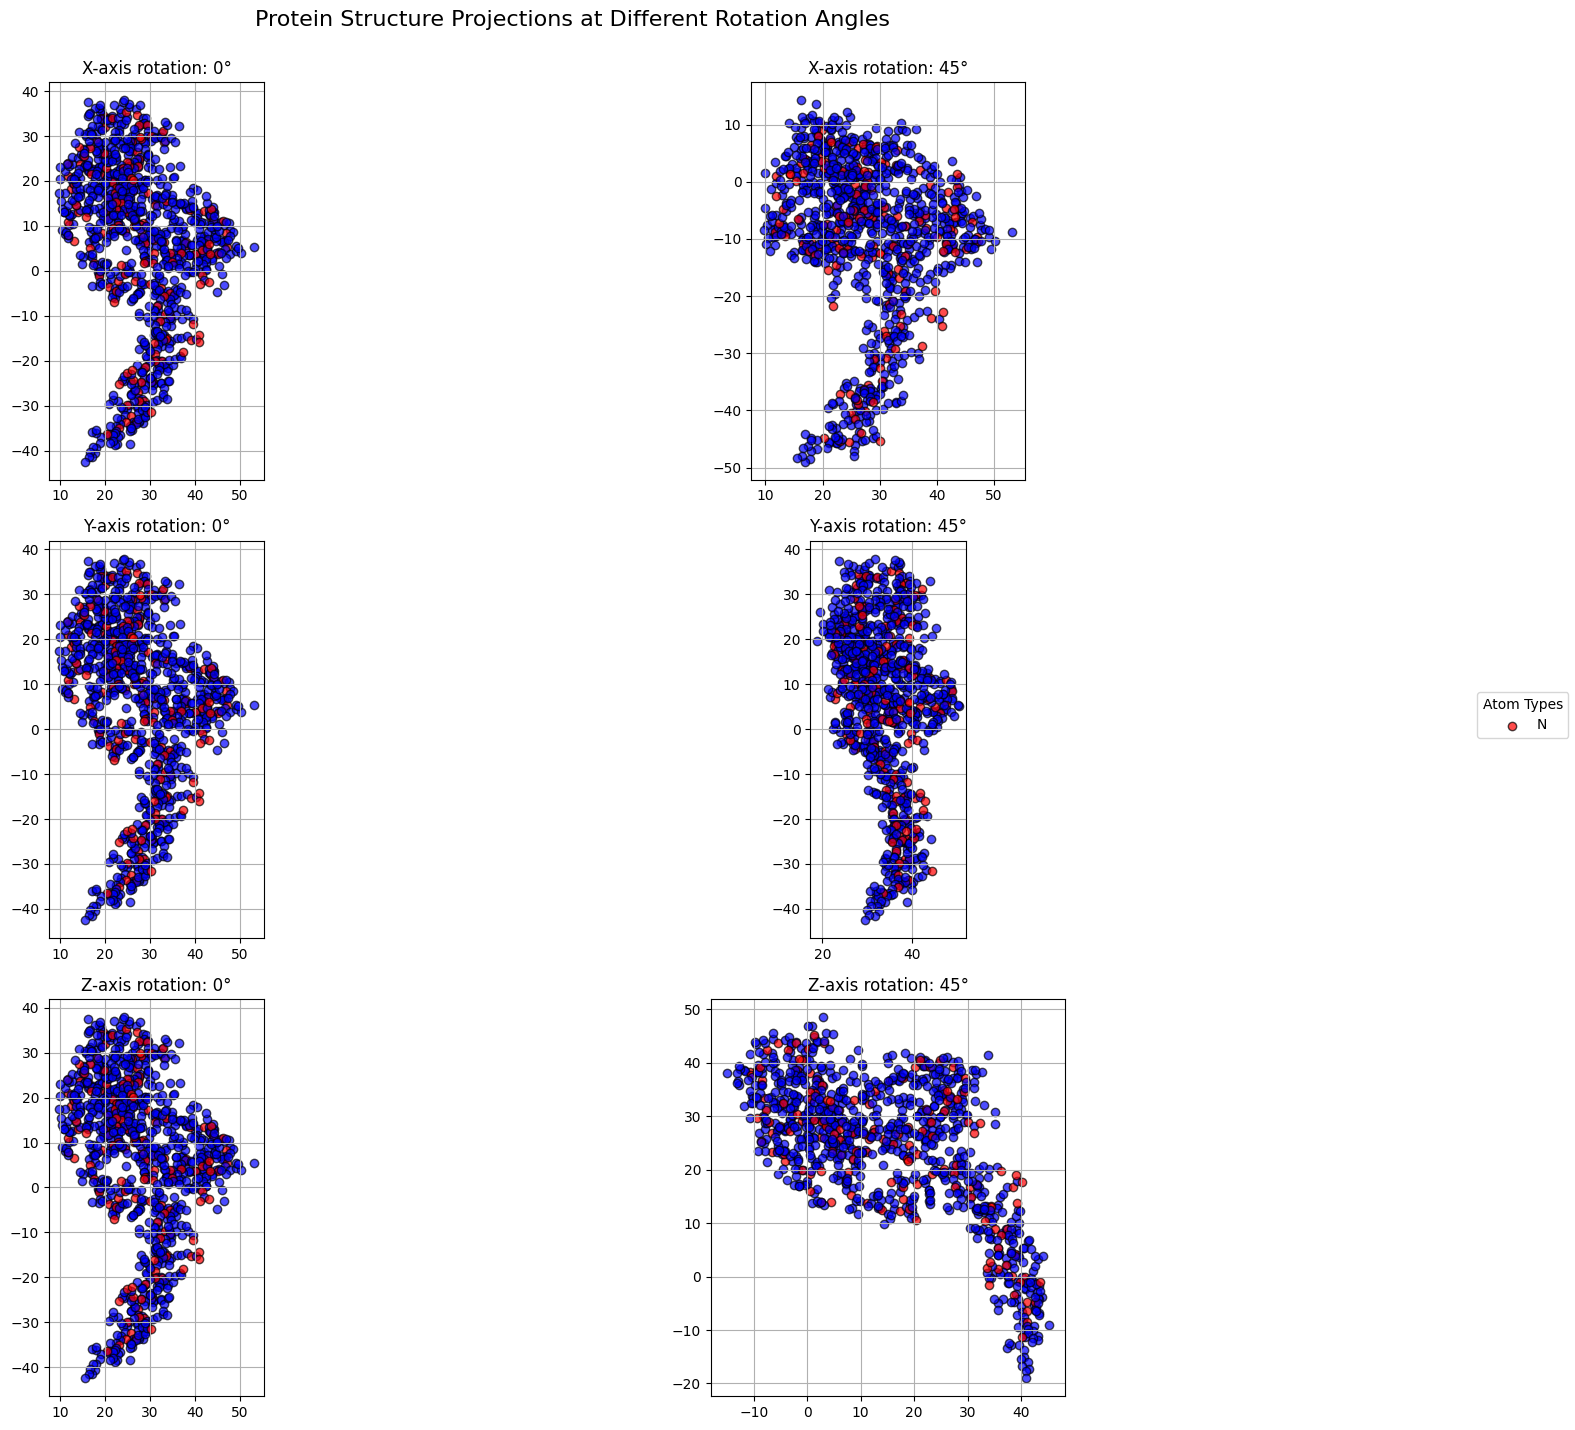

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation

class ProteinVisualizer:
    def __init__(self, pdb_file):
        self.parser = PDBParser(QUIET=True)
        self.structure = self.parser.get_structure("protein", pdb_file)
        self.atoms, self.atom_types = self.extract_atoms()

    def extract_atoms(self):
        """Extract atomic coordinates and types from the structure"""
        atoms = []
        atom_types = []

        for atom in self.structure.get_atoms():
            atoms.append(atom.coord)
            atom_types.append(atom.element)

        return np.array(atoms), atom_types

    def rotate_structure(self, angles):
        """Rotate atomic coordinates using Euler angles (in degrees)"""
        rot = Rotation.from_euler('xyz', angles, degrees=True)
        return rot.apply(self.atoms)

    def project_to_2d(self, rotated_coords):
        """Project 3D coordinates to 2D plane (simple orthographic projection)"""
        return rotated_coords[:, :2]

    def plot_projection(self, coords_2d, ax, title):
        """Plot 2D projection with atom-specific coloring"""
        for i, (coord, atom_type) in enumerate(zip(coords_2d, self.atom_types)):
            color = 'red' if atom_type == 'N' else 'blue'
            ax.scatter(coord[0], coord[1], c=color, alpha=0.7,
                      edgecolors='k', label=atom_type if i == 0 else "")

        ax.set_title(title)
        ax.grid(True)
        ax.set_aspect('equal')

    def create_rotation_plots(self):
        """Create plots for multiple rotations"""
        angles = np.arange(0, 360, 45)
        n_rows = 3  # One row for each axis
        n_cols = len(angles) // 3

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
        fig.suptitle('Protein Structure Projections at Different Rotation Angles',
                    fontsize=16, y=0.95)

        for i, axis in enumerate(['X', 'Y', 'Z']):
            for j, angle in enumerate(angles[:(n_cols)]):
                rotation = np.zeros(3)
                rotation[i] = angle

                rotated_coords = self.rotate_structure(rotation)
                projected_coords = self.project_to_2d(rotated_coords)

                title = f'{axis}-axis rotation: {angle}°'
                self.plot_projection(projected_coords, axes[i, j], title)

        # Add legend
        handles, labels = axes[0, 0].get_legend_handles_labels()
        fig.legend(handles, labels, loc='center right', title='Atom Types')

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])
        return fig

def main():
    # Replace with your PDB file path
    pdb_file = "example.pdb"

    visualizer = ProteinVisualizer(pdb_file)
    fig = visualizer.create_rotation_plots()

    # Save the figure
    plt.savefig('protein_projections.png', dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    main()

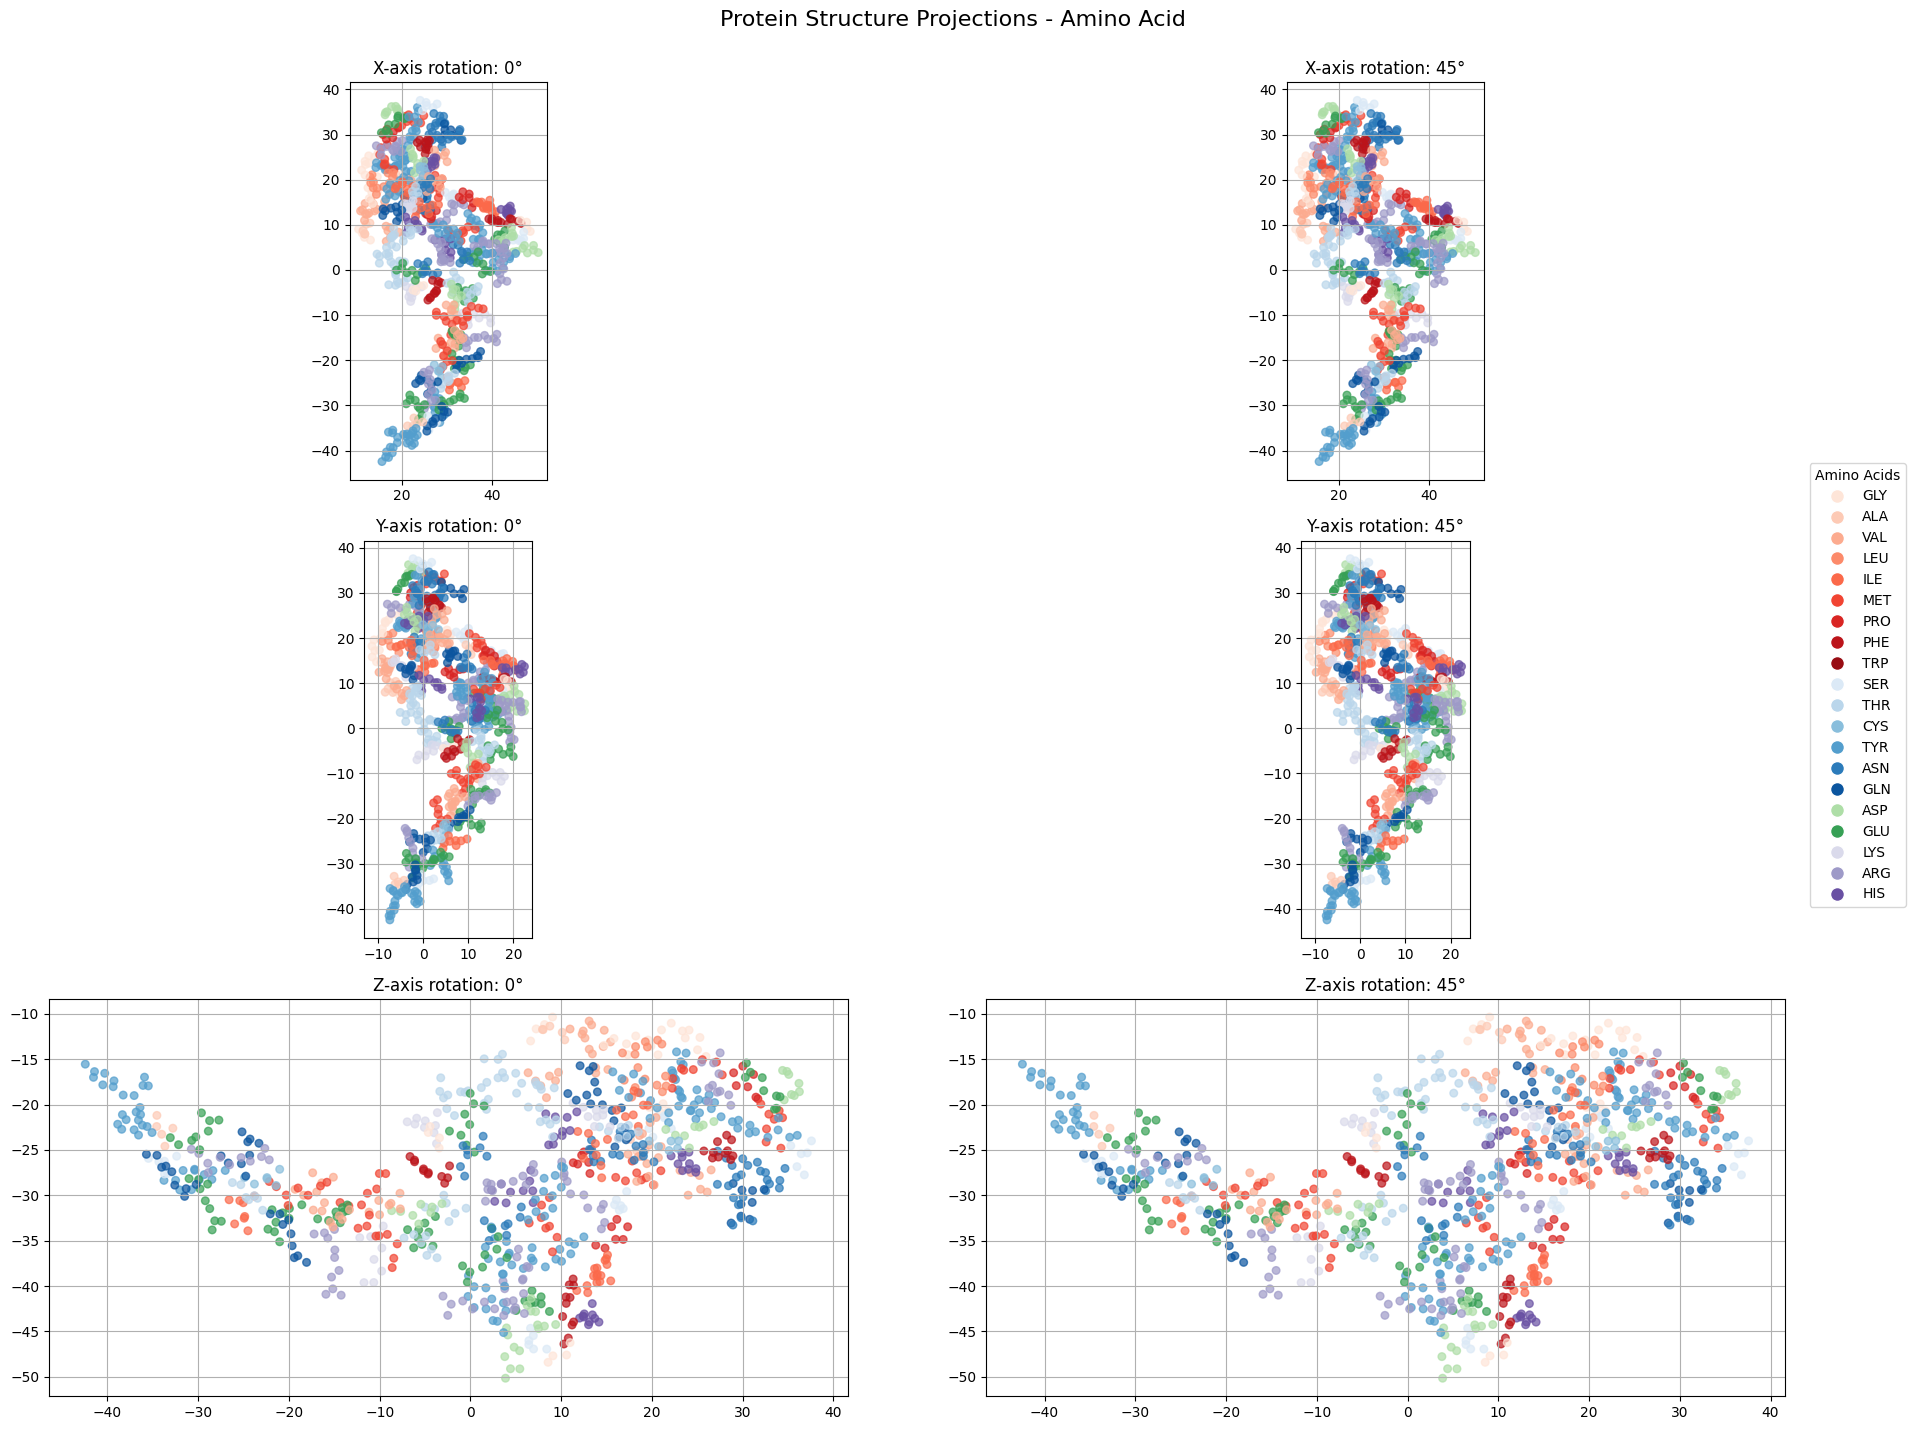

<Figure size 640x480 with 0 Axes>

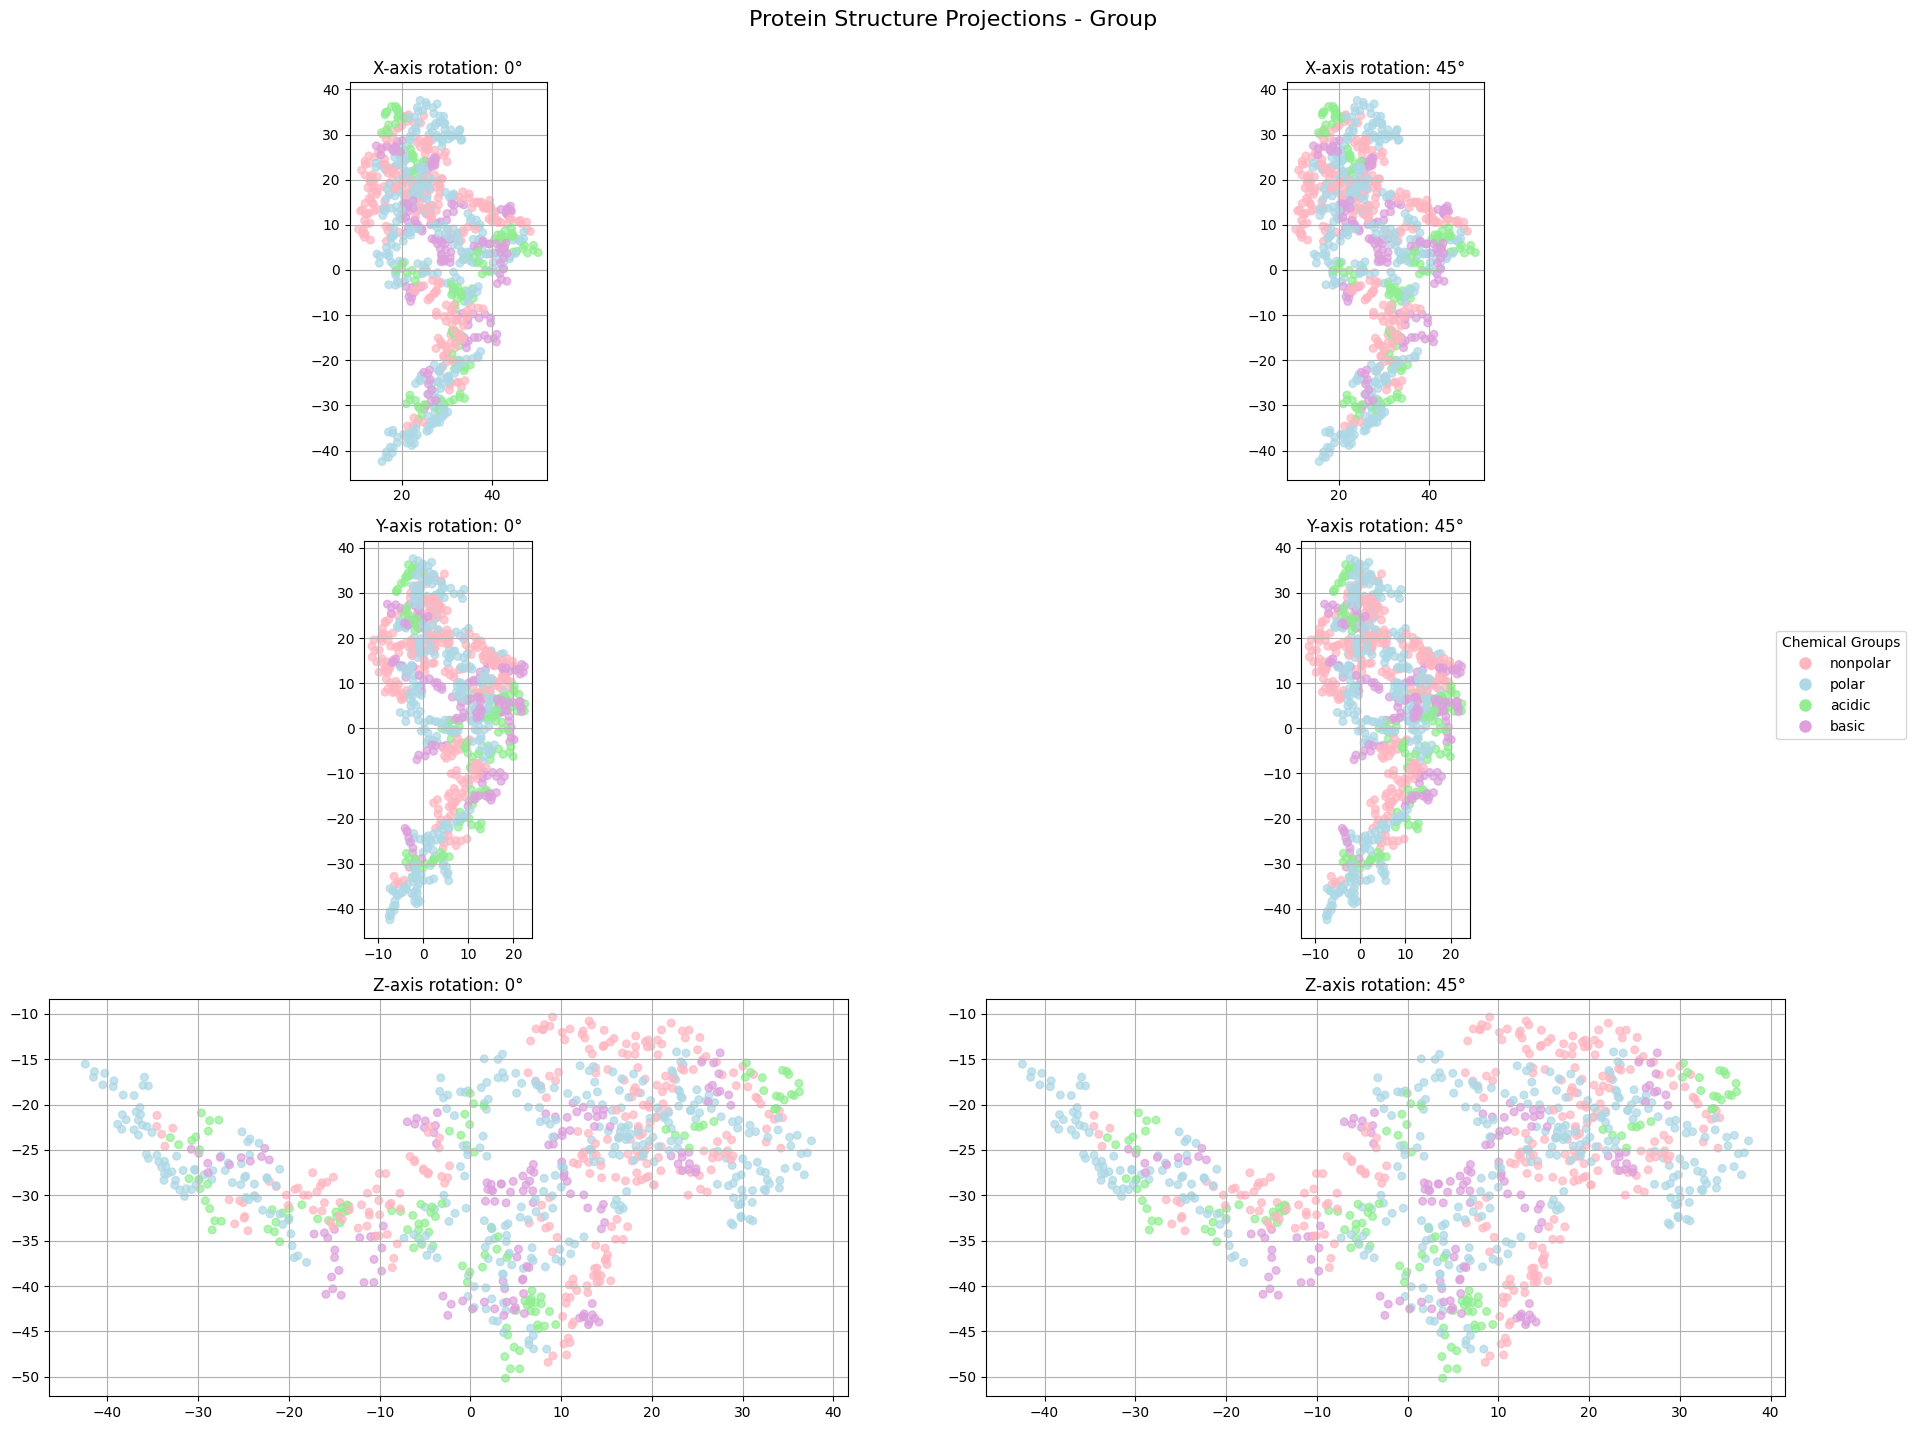

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from scipy.spatial.transform import Rotation
import seaborn as sns
from typing import Dict, List, Tuple, Optional
from dataclasses import dataclass
import warnings
warnings.filterwarnings('ignore')

@dataclass
class AminoAcidGroups:
    NONPOLAR = ['GLY', 'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PRO', 'PHE', 'TRP']
    POLAR = ['SER', 'THR', 'CYS', 'TYR', 'ASN', 'GLN']
    ACIDIC = ['ASP', 'GLU']
    BASIC = ['LYS', 'ARG', 'HIS']

class ProteinVisualizer:
    def __init__(self, pdb_file: str):
        """Initialize protein visualizer with PDB file."""
        self.parser = PDBParser(QUIET=True)
        self.structure = self.parser.get_structure("protein", pdb_file)
        self._setup_color_schemes()
        self.atoms, self.residues = self._extract_structure_info()

    def _setup_color_schemes(self) -> None:
        """Set up color schemes for amino acids and chemical groups."""
        self.aa_groups = {
            'nonpolar': AminoAcidGroups.NONPOLAR,
            'polar': AminoAcidGroups.POLAR,
            'acidic': AminoAcidGroups.ACIDIC,
            'basic': AminoAcidGroups.BASIC
        }

        # Generate color palettes efficiently
        color_specs = [
            ('nonpolar', "Reds", len(AminoAcidGroups.NONPOLAR)),
            ('polar', "Blues", len(AminoAcidGroups.POLAR)),
            ('acidic', "Greens", len(AminoAcidGroups.ACIDIC)),
            ('basic', "Purples", len(AminoAcidGroups.BASIC))
        ]

        self.aa_colors = {}
        for group, palette, size in color_specs:
            colors = sns.color_palette(palette, n_colors=size)
            self.aa_colors.update(dict(zip(self.aa_groups[group], colors)))

        # Define group colors
        self.group_colors = {
            'nonpolar': '#FFB6C1',
            'polar': '#ADD8E6',
            'acidic': '#90EE90',
            'basic': '#DDA0DD'
        }

    def _get_aa_group(self, residue_name: str) -> Optional[str]:
        """Determine amino acid group."""
        return next((group for group, residues in self.aa_groups.items()
                    if residue_name in residues), None)

    def _extract_structure_info(self) -> Tuple[np.ndarray, List[Dict]]:
        """Extract atomic coordinates and residue information."""
        atoms = []
        residues = []
        all_aa = set(sum(self.aa_groups.values(), []))

        for atom in self.structure.get_atoms():
            residue = atom.get_parent()
            if residue.get_resname() in all_aa:
                atoms.append(atom.coord)
                residues.append({
                    'name': residue.get_resname(),
                    'group': self._get_aa_group(residue.get_resname()),
                    'atom_name': atom.get_name()
                })

        return np.array(atoms), residues

    def create_rotated_projections(self, view_type: str = 'amino_acid') -> None:
        """Generate and display rotated projections of the protein structure."""
        angles = np.arange(0, 360, 45)
        n_rows, n_cols = 3, len(angles) // 3

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
        fig.suptitle(f'Protein Structure Projections - {view_type.replace("_", " ").title()}',
                    fontsize=16, y=0.95)

        # Prepare colors dictionary
        colors_dict = self.aa_colors if view_type == 'amino_acid' else self.group_colors
        legend_title = 'Amino Acids' if view_type == 'amino_acid' else 'Chemical Groups'

        # Pre-calculate rotations for efficiency
        rotations = {
            axis: Rotation.from_euler(axis.lower(), angle, degrees=True).as_matrix()
            for axis, angle in zip(['X', 'Y', 'Z'], angles)
        }

        # Create visualizations
        for i, axis in enumerate(['X', 'Y', 'Z']):
            for j, angle in enumerate(angles[:(n_cols)]):
                ax = axes[i, j]

                # Apply rotation
                rotated = self.atoms @ rotations[axis]

                # Plot points efficiently
                colors = [colors_dict[res['name' if view_type == 'amino_acid' else 'group']]
                         for res in self.residues]

                ax.scatter(rotated[:, 0], rotated[:, 1], c=colors, alpha=0.7, s=30)
                ax.set_title(f'{axis}-axis rotation: {angle}°')
                ax.grid(True)
                ax.set_aspect('equal')

        # Add legend
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor=color, label=name, markersize=10)
                         for name, color in colors_dict.items()]
        fig.legend(handles=legend_elements, title=legend_title,
                  loc='center right', bbox_to_anchor=(0.98, 0.5))

        plt.tight_layout(rect=[0, 0, 0.95, 0.95])
        plt.show()

    def save_visualization(self, filename: str, view_type: str = 'amino_acid', dpi: int = 300) -> None:
        """Save visualization to file."""
        fig = plt.gcf()
        fig.savefig(f'{filename}_{view_type}.png', dpi=dpi, bbox_inches='tight')

def main():
    # Set up visualization parameters
    pdb_file = "example.pdb"  # Replace with your PDB file path
    visualizer = ProteinVisualizer(pdb_file)

    # Generate both types of visualizations
    for view_type in ['amino_acid', 'group']:
        visualizer.create_rotated_projections(view_type)
        visualizer.save_visualization('protein_structure', view_type)

if __name__ == "__main__":
    main()

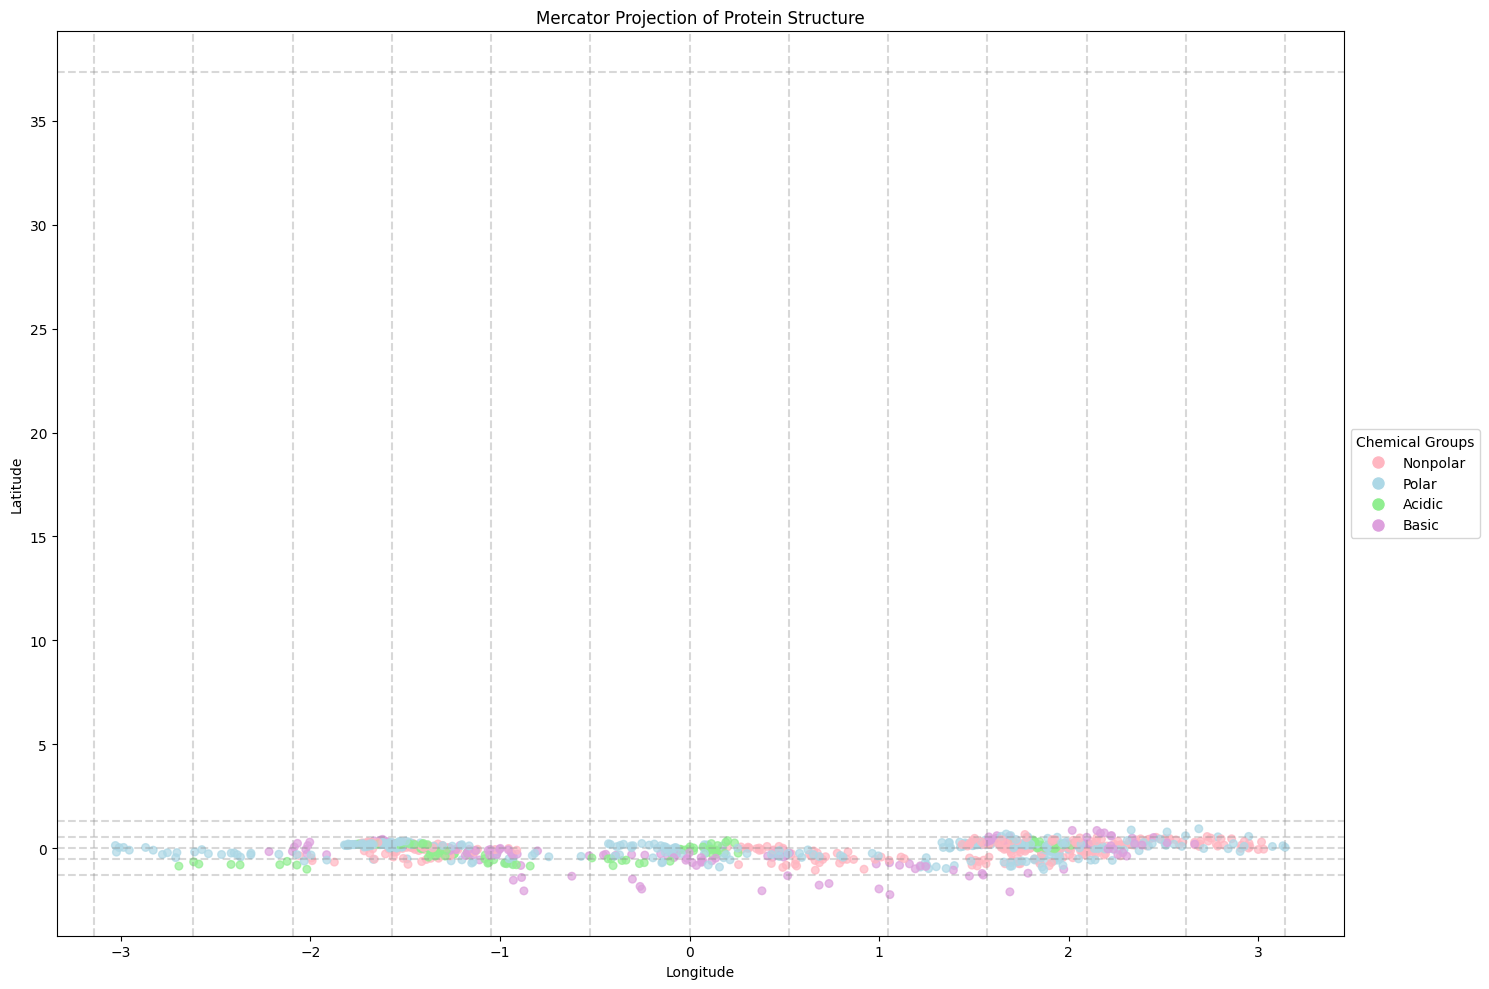

<Figure size 640x480 with 0 Axes>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
from typing import Tuple, List, Dict
from dataclasses import dataclass
import warnings
warnings.filterwarnings('ignore')

class SphericalProteinProjector:
    def __init__(self, pdb_file: str):
        self.parser = PDBParser(QUIET=True)
        self.structure = self.parser.get_structure("protein", pdb_file)
        self.setup_amino_acid_properties()
        self.atoms, self.residues = self.extract_structure_info()
        self.center = self.calculate_center()

    def setup_amino_acid_properties(self):
        """Define amino acid properties and their color mappings."""
        self.aa_groups = {
            'nonpolar': ['GLY', 'ALA', 'VAL', 'LEU', 'ILE', 'MET', 'PRO', 'PHE', 'TRP'],
            'polar': ['SER', 'THR', 'CYS', 'TYR', 'ASN', 'GLN'],
            'acidic': ['ASP', 'GLU'],
            'basic': ['LYS', 'ARG', 'HIS']
        }

        # Color mapping for chemical properties
        self.group_colors = {
            'nonpolar': '#FFB6C1',
            'polar': '#ADD8E6',
            'acidic': '#90EE90',
            'basic': '#DDA0DD'
        }

    def calculate_center(self) -> np.ndarray:
        """Calculate the center of mass of the protein."""
        return np.mean(self.atoms, axis=0)

    def extract_structure_info(self) -> Tuple[np.ndarray, List[Dict]]:
        """Extract atomic coordinates and residue information."""
        atoms = []
        residues = []
        all_aa = set(sum(self.aa_groups.values(), []))

        for atom in self.structure.get_atoms():
            residue = atom.get_parent()
            if residue.get_resname() in all_aa:
                atoms.append(atom.coord)
                residues.append({
                    'name': residue.get_resname(),
                    'group': next((group for group, aas in self.aa_groups.items()
                                 if residue.get_resname() in aas), None)
                })

        return np.array(atoms), residues

    def cartesian_to_spherical(self, coords: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Convert Cartesian coordinates to spherical coordinates (latitude, longitude)."""
        # Translate coordinates to be centered at protein's center of mass
        centered_coords = coords - self.center

        # Convert to spherical coordinates
        r = np.sqrt(np.sum(centered_coords**2, axis=1))
        theta = np.arccos(centered_coords[:, 2] / r)  # latitude
        phi = np.arctan2(centered_coords[:, 1], centered_coords[:, 0])  # longitude

        # Convert to degrees
        lat = 90 - np.degrees(theta)  # Convert colatitude to latitude
        lon = np.degrees(phi)

        return lat, lon

    def mercator_projection(self, lat: np.ndarray, lon: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Apply Mercator projection to spherical coordinates."""
        # Convert back to radians for projection
        lat_rad = np.radians(lat)
        lon_rad = np.radians(lon)

        # Mercator projection formulas
        x = lon_rad
        y = np.log(np.tan(np.pi/4 + lat_rad/2))

        return x, y

    def create_projection(self, view_type: str = 'group') -> None:
        """Create the spherical projection visualization."""
        # Get spherical coordinates
        lat, lon = self.cartesian_to_spherical(self.atoms)

        # Apply Mercator projection
        x, y = self.mercator_projection(lat, lon)

        # Create figure
        plt.figure(figsize=(15, 10))

        # Prepare colors based on view type
        colors = [self.group_colors[res[view_type]] for res in self.residues]

        # Create scatter plot
        plt.scatter(x, y, c=colors, alpha=0.7, s=30)

        # Add gridlines for longitude and latitude
        for lat_line in range(-90, 91, 30):
            lat_rad = np.radians(lat_line)
            y_line = np.log(np.tan(np.pi/4 + lat_rad/2))
            plt.axhline(y=y_line, color='gray', linestyle='--', alpha=0.3)

        for lon_line in range(-180, 181, 30):
            plt.axvline(x=np.radians(lon_line), color='gray', linestyle='--', alpha=0.3)

        # Customize plot
        plt.title('Mercator Projection of Protein Structure')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')

        # Add colorbar legend
        unique_groups = list(self.group_colors.keys())
        legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                    markerfacecolor=self.group_colors[group],
                                    label=group.title(),
                                    markersize=10)
                         for group in unique_groups]
        plt.legend(handles=legend_elements, title='Chemical Groups',
                  loc='center left', bbox_to_anchor=(1, 0.5))

        plt.tight_layout()
        plt.show()

    def save_projection(self, filename: str, dpi: int = 300) -> None:
        """Save the projection to a file."""
        plt.savefig(filename, dpi=dpi, bbox_inches='tight')

def main():
    pdb_file = "example.pdb"  # Replace with your PDB file path
    projector = SphericalProteinProjector(pdb_file)
    projector.create_projection()
    projector.save_projection('protein_mercator_projection.png')

if __name__ == "__main__":
    main()